# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [2]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

/Users/jessicavincent/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/jessicavincent/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [3]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print ('data shape: ', X.shape)
print ('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


### (1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

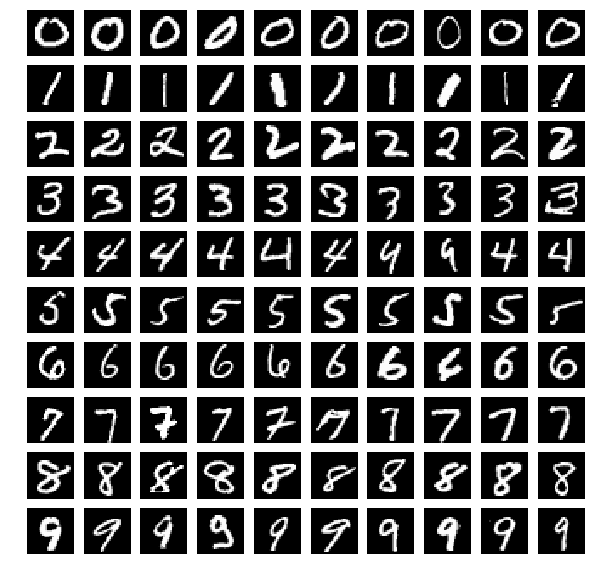

In [4]:
def P1(num_examples):
    """Creates a num_examples x 10 sized grid with
    num_examples of each 0-9 digit"""

### STUDENT START ###
    
    digits=()
    
    #create num_examples of each digit
    for i in range(0,10):
        z=np.argwhere(mini_train_labels==i)[0:num_examples]
        digits+=z,
        
    digits=np.array(digits).reshape(10*num_examples,1)
    
    #plot the examples of each digit
    fig = plt.figure(figsize=(10,num_examples)) #scale the size with the input
    for i in range(1,10*num_examples+1):
        plt.subplot(10,num_examples,i)
        plt.style.use("grayscale")
        plt.axis('off')
        plt.imshow(mini_train_data[digits[i-1]].reshape((28,28)))
    
### STUDENT END ###

P1(10)

### (2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [5]:
def P2(k_values):
    """Ouputs accuracy for any input k_values. 
    If k=1 is passed as an input, will also output precision, recall, and F1 table"""

### STUDENT START ###

    for k in k_values:
        #report accuracy for all values
        
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(mini_train_data,mini_train_labels)
        predict=knn.predict(dev_data)
        print("k=",k,", Accuracy = ", knn.score(dev_data,dev_labels))
        
        #Show precision, recall, and F1 for k=1
        if k==1:
            print(classification_report(dev_labels,predict))
    
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

k= 1 , Accuracy =  0.888
             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000

k= 3 , Accuracy =  0.878
k= 5 , Accuracy =  0.869
k= 7 , Accuracy =  0.865
k= 9 , Accuracy =  0.863


#### ANSWER:

**For k=1**, the we see that the most difficult digit is 9, since it has the lowest f1-score. Since the f1 score can be interpreted as a weighted average of the precision and recall, we use this metrics to answer this question, though it does not have the lowest precision or recall score in general.

**For all k_values** passed into the function, we wee that k=9 produces the lowest accuracy.

***Note***: I use "we" in my write up style, but this is in fact a solo write up :)

### (3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [6]:
def P3(train_sizes):
    """Outputs accuracy and prediction time for an inputed list of training sizes"""

### STUDENT START ###

    for k in train_sizes:
        
        #define training and labels based on size inputs
        knn = KNeighborsClassifier(n_neighbors=1)
        knn.fit(train_data[:k],train_labels[:k])
        
        #time the prediction component
        #move start to include model fitting or end to include scoring in timing
        start = time.time()
        predict = knn.predict(dev_data)
        end = time.time()
        
        #determine accuracy and print 
        score = knn.score(dev_data,dev_labels)
        print("k=1, Training Size= ", k, ", Accuracy= ", score, 
              ", Time Elapsed for Prediction= ", (end-start), "seconds \n")
        accuracies.append(score)

### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes)

k=1, Training Size=  100 , Accuracy=  0.72 , Time Elapsed for Prediction=  0.11776995658874512 seconds 

k=1, Training Size=  200 , Accuracy=  0.786 , Time Elapsed for Prediction=  0.22051596641540527 seconds 

k=1, Training Size=  400 , Accuracy=  0.841 , Time Elapsed for Prediction=  0.46208715438842773 seconds 

k=1, Training Size=  800 , Accuracy=  0.884 , Time Elapsed for Prediction=  0.8792297840118408 seconds 

k=1, Training Size=  1600 , Accuracy=  0.902 , Time Elapsed for Prediction=  1.7861671447753906 seconds 

k=1, Training Size=  3200 , Accuracy=  0.926 , Time Elapsed for Prediction=  3.578065872192383 seconds 

k=1, Training Size=  6400 , Accuracy=  0.937 , Time Elapsed for Prediction=  6.979108095169067 seconds 

k=1, Training Size=  12800 , Accuracy=  0.959 , Time Elapsed for Prediction=  14.200191020965576 seconds 

k=1, Training Size=  25000 , Accuracy=  0.97 , Time Elapsed for Prediction=  27.848827838897705 seconds 



### (4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

Standard: Predicted accuracy when training size is 60000 = [[ 1.24307226]]

Log: Predicted accuracy when training size is 60000 = 1.3267321815403657
Log(accuracy) prediction = [[ 0.28271891]]

Logit: Predicted accuracy when training size is 60000 = 0.9988179603283155
Logit(accuracy) prediction = [[ 6.73933106]]


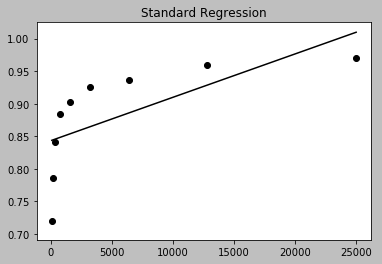

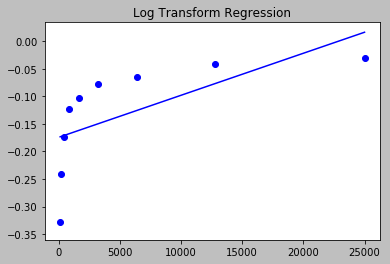

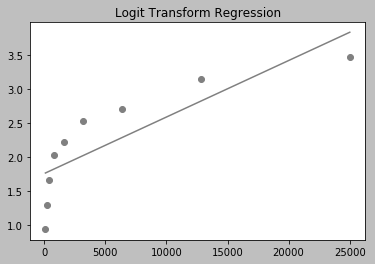

In [7]:
import math #to apply log transformation, hope this is okay

def P4(train_sizes, accuracies, n, Transform):
    """train_sizes=list of training sample size, accuracies=list of associated accuracies,
    n = training_size for prediction, Transform= Standard, Log, or Logit"""

### STUDENT START ###
    
    #reshape inputs for linear regression 
    training = np.reshape(train_sizes, (len(train_sizes),1))
    
    #Run Standard Regression
    if Transform=="Standard":
        
        accuracy = np.reshape(accuracies, (len(accuracies),1))
        
        #Define Standard Regression
        LReg = LinearRegression()
        LReg.fit(training, accuracy)
        
        #Plot Standard Regression
        plt.figure(0)
        plt.title("Standard Regression")
        plt.scatter(train_sizes, accuracies, color='black')
        plt.plot(train_sizes, LReg.predict(training), color='black')
        
        #Predict for n
        PReg=LReg.predict(n)
        print("Standard: Predicted accuracy when training size is", n, "=", PReg)
    
    #Run Log Regression
    if Transform=="Log":
        
        #Reshape and define log(accuracy)
        log_acc = [math.log(k) for k in accuracies]
        log_accuracy = np.reshape(log_acc, (len(log_acc),1))
        
        #Define Log Regression
        LogReg = LinearRegression()
        LogReg.fit(training, log_accuracy)
        
        #Plot Log Regression
        plt.figure(1)
        plt.title("Log Transform Regression")
        plt.scatter(train_sizes, log_accuracy, color='blue')
        plt.plot(train_sizes, LogReg.predict(training), color='blue')
        
        #Predict for n and convert using exp(n) 
        LogP=LogReg.predict(n)
        print("\nLog: Predicted accuracy when training size is", n, "=", math.exp(LogP))
        print("Log(accuracy) prediction =", LogP)
        
    if Transform=="Logit":
        
        #Reshape and define logit(accuracy)
        logit_acc = [math.log(k/(1-k)) for k in accuracies]
        logit_accuracy = np.reshape(logit_acc, (len(logit_acc),1))
        
        #Define Log Regression
        Logit = LinearRegression()
        Logit.fit(training,logit_accuracy)
        
        #Plot Logit Regression
        plt.figure(2)
        plt.title("Logit Transform Regression")
        plt.scatter(train_sizes, logit_accuracy, color='gray')
        plt.plot(train_sizes, Logit.predict(training), color='gray')
        
        #Predict for n and convert using exp(n)
        LogitP=Logit.predict(n)
        print("\nLogit: Predicted accuracy when training size is", n, "=", math.exp(LogitP)/(1+math.exp(LogitP)))
        print("Logit(accuracy) prediction =", LogitP)
        
### STUDENT END ###

P4(train_sizes, accuracies, 60000, "Standard")
P4(train_sizes, accuracies, 60000, "Log")
P4(train_sizes, accuracies, 60000, "Logit")

#### ANSWER:

Standard regression predicts an accuracy of 1.24 for n=60000. However, this is a problem in that accuracy can't exceed 1 in practical terms. Therefore, we look to apply both a log and logit transformation to the accuracy data to see if we can improve this. For the log transformation, we get a prediction of log(accuracy)=.28, which using the exp() we convert back to a predicted accuracy of 1.33, which is still inappropriate given the context. However, for the logit transformation we do get a prediction of logit(accuracy)=6.74, or a predicted accuracy of .999, which is more appropriate. We do see however, that for each of these transformations, the scatter plots still do not appear linear.

### (5) Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

[[ 99   0   0   0   0   0   0   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  1   0  98   2   0   0   0   1   0   0]
 [  0   0   0  83   0   1   0   0   1   1]
 [  0   0   0   0 102   0   0   0   0   2]
 [  1   0   0   0   0  88   0   0   1   1]
 [  1   0   0   0   1   0  96   0   0   0]
 [  0   0   1   0   0   0   0 111   0   1]
 [  1   0   1   2   0   2   1   0  89   0]
 [  0   0   0   0   0   0   0   0   0 106]]

Example Mistakes (Label, Predicted):  (6.0, 4.0)

Example Mistakes (Label, Predicted):  (7.0, 2.0)

Example Mistakes (Label, Predicted):  (8.0, 3.0)

Example Mistakes (Label, Predicted):  (3.0, 8.0)


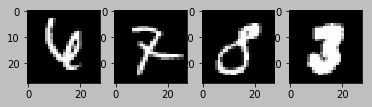

In [8]:
def P5(num_examples):
    """Output confusion matrix and "examples" number of incorrect predictions"""
    
### STUDENT START ###

    #Generate confusion matrix
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(train_data,train_labels)
    predict=knn.predict(dev_data)
    print(confusion_matrix(dev_labels,predict))   

    #Define set of incorrect predictions and take num_examples number of examples
    correct = enumerate(predict==dev_labels)
    errors = [index for index, x in correct if x==False][0:num_examples] 
    
    #Display smapled errors 
    for i in range(num_examples):
        print("\nExample Mistakes (Label, Predicted): ", (dev_labels[errors[i]], predict[errors[i]]))
    
    #Plot sampled errors
    fig, ax = plt.subplots(1, num_examples)
    plt.style.use("grayscale")
    for index, digit in enumerate(ax):
        digit.imshow(np.reshape(dev_data[errors[index]], (28,28)))
    
### STUDENT END ###

P5(4)

#### Answer:

From the confusion matrix, we see that 8s and 3s, 8s and 5s, and 9s and 4s are most commonly confused, though from the examples see also an instance of an incorrect 6 and 4 as well as 7 and 2.

### (6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel. 

#### Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:

- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [9]:
### STUDENT START ###

def P6(blur_data):
    """Applies blurring (weighted combination of original value
    and immediate neighbors) to input data"""

### STUDENT START ###
    
    #reshape
    z=[np.reshape(data, (28,28)) for data in blur_data]
    blur = []

    for digit in range(len(z)):
        
        #create a placeholder 28x28 grid of 0s
        box = [[0 for x in range(28)] for y in range(28)] 
        
        #loop through and define the weighted blur for each space
        for col in range(28):
            for row in range(28):
                
                #define weighting for corners where there are only 3 neighbors
                if col==0 and row==0:
                    box[row][col]=(z[digit][row][col]+z[digit][row+1][col+1]
                                   +z[digit][row+1][col]+z[digit][row][col+1])/4
                elif col==0 and row==27:
                    box[row][col]=(z[digit][row][col]+z[digit][row-1][col+1]
                                   +z[digit][row-1][col]+z[digit][row][col+1])/4
                elif col==27 and row==0:
                    box[row][col]=(z[digit][row][col]+z[digit][row+1][col-1]
                                   +z[digit][row+1][col]+z[digit][row][col-1])/4
                elif col==27 and row==27:
                    box[row][col]=(z[digit][row][col]+z[digit][row-1][col-1]
                                   +z[digit][row-1][col]+z[digit][row][col-1])/4
                
                #define weighting for edges where there are only 5 neighbors
                elif col==0:
                    box[row][col]=(z[digit][row][col]+z[digit][row+1][col+1]
                                   +z[digit][row-1][col+1]+z[digit][row+1][col]
                                   +z[digit][row-1][col]+z[digit][row][col+1])/6
                elif row==0:
                    box[row][col]=(z[digit][row][col]+z[digit][row+1][col+1]
                                   +z[digit][row+1][col-1]+z[digit][row+1][col]
                                   +z[digit][row][col+1]+z[digit][row][col-1])/6
                elif col==27:
                    box[row][col]=(z[digit][row][col]+z[digit][row-1][col-1]
                                   +z[digit][row+1][col-1]+z[digit][row+1][col]
                                   +z[digit][row-1][col]+z[digit][row][col-1])/6
                elif row==27:
                    box[row][col]=(z[digit][row][col]+z[digit][row-1][col-1]
                                   +z[digit][row-1][col+1]+z[digit][row-1][col]
                                   +z[digit][row][col+1]+z[digit][row][col-1])/6
                
                #define weighting for all other spaces with 8 neighbors
                else:
                    box[row][col]=(z[digit][row][col]+z[digit][row+1][col+1]+z[digit][row-1][col-1]
                                   +z[digit][row+1][col-1]+z[digit][row-1][col+1]+z[digit][row+1][col]
                                   +z[digit][row-1][col]+z[digit][row][col+1]+z[digit][row][col-1])/9
        
        #apply new weighted value to placeholder space
        blur.append(box)
    return(blur)

#Use P6 to blur training and dev data
blurred_dev = P6(dev_data)
blurred_dev = np.reshape(blurred_dev,(len(dev_labels),-1))
blurred_train = P6(mini_train_data)
blurred_train = np.reshape(blurred_train,(len(mini_train_labels),-1))

def Test(train,dev):
    """Report knn accuracy for input training and dev data. 
    Uses mini_train_labels and dev_labels as default"""
    
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(train,mini_train_labels)
    predict=knn.predict(dev)
    score=knn.score(dev,dev_labels)
    print("Accuracy=",score)

#Test accuracy with no blur
print("No Blur: ") 
Test(mini_train_data,dev_data)

#Test accuracy with blurred training data
print("\nBlurred Training:")
Test(blurred_train,dev_data)

#Test accuracy with blurred dev data
print("\nBlurred Dev:")
Test(mini_train_data,blurred_dev)

#Test accuracy with blurred training data and blurred dev data
print("\nBlurred Training and Dev:")
Test(blurred_train,blurred_dev)

### STUDENT END ###

No Blur: 
Accuracy= 0.888

Blurred Training:
Accuracy= 0.908

Blurred Dev:
Accuracy= 0.871

Blurred Training and Dev:
Accuracy= 0.902


#### ANSWER:

From the output it seems that blurring the training data only results in the highest accuracy score, while blurring both the training and dev data is only .006 worse. It is worth noting that blurring the dev data alone worsens the accuracy score to below the standard (non-blurred) output.

### (7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). 

While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [11]:
def P7():
    """Return Bernoulli and Multinomial Accuracy measures for mini_train_data"""

### STUDENT START ###

    #Define Bernoulli model and binarize at .5
    brn = BernoulliNB(binarize=.5)
    brn.fit(mini_train_data, mini_train_labels)
    predict = brn.predict(dev_data)
    print("Bernoulli Accuracy: ", brn.score(dev_data,dev_labels))
    
    #map the original 0-1 continuous range to a 0-2 discrete range
    m_data =[[round(2*pixel) for pixel in digit] for digit in mini_train_data]
    
    #define Multinomial model
    mnb = MultinomialNB()
    mnb.fit(m_data, mini_train_labels)
    pred = mnb.predict(dev_data)
    print("Multinomial Accuracy: ", mnb.score(dev_data,dev_labels))
    
### STUDENT END ###

P7()

Bernoulli Accuracy:  0.815
Multinomial Accuracy:  0.801


#### ANSWER: 

For the BernoulliNB, we binarize at .5, mapping pixel values below .5 to 0 and above .5 to 1, resulting in an accuracy of .815. 

For the MultinomialNB, we must now map pixel values to 0, 1, or 2. Looking at the pixel values in the mini_train_labels, we see that they range from 0 to 1. Since we need to double our range, we look to multiply pixel values by 2, and then round to the nearest integer. With this approach, values originally from 0-.24 will map to 0, values originally from .25-.74 will map to 1, and values originally from .76-1 will map to 2. We see that therefore the range that maps to 1 is double the size of the other two, but decide this is ultimately okay since there are more shades of gray than white or black as observed by the human eye. With this mapping we get an accuracy of .801.

Comparing the accuracies, we see that the multinomial approach actually decreased the score. This could be due the the fact that mapping to three values creates more complexity or noise, and additionally due to the fact that we have a broad gray range, reducing distinction.

### (8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [12]:
def P8(alphas):
    """Determine best alpha performance from input list of alphas. Return 
    accuracy for best alpha as well as accuracy for alpha=0"""
### STUDENT START ###

    #find best alpha using .best_params_
    brn = BernoulliNB(binarize = .5)
    search = GridSearchCV(brn,alphas)
    search.fit(mini_train_data,mini_train_labels)
    print(search.best_params_)
    print ("Best alpha value= ",search.best_params_["alpha"])
    
    #find accuracy associated with best alpha
    z=search.best_params_['alpha']
    brn1 = BernoulliNB(alpha=z,binarize=0.5)
    brn1.fit(mini_train_data,mini_train_labels)
    predict1 = brn1.predict(dev_data)
    print("Accuracy for alpha=", z,"is", brn1.score(dev_data,dev_labels))
    
    #find accuracy for alpha=0
    brn2 = BernoulliNB(alpha=0,binarize=0.5)
    brn2.fit(mini_train_data,mini_train_labels)
    predict2 = brn2.predict(dev_data)
    print("\nAccuracy when alpha = 0 is", brn2.score(dev_data,dev_labels))

### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

/Users/jessicavincent/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:801: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
/Users/jessicavincent/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:801: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
/Users/jessicavincent/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:820: RuntimeWarning: divide by zero encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
/Users/jessicavincent/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:801: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -


{'alpha': 0.01}
Best alpha value=  0.01
Accuracy for alpha= 0.01 is 0.818

Accuracy when alpha = 0 is 0.099


/Users/jessicavincent/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:801: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -


In [13]:
#print nb.best_params_
##included in output above

#### ANSWER:

The best alpha value is .01 with an accuracy of .818. For alpha=0, we get an accuracy score of .099, which is very low. This, however, is not surprising because it implies no smoothing, and there will likely be values in our test set that were not seen in the training set.

### (9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. 

You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [14]:
def P9():
    """Return Gaussian Accuracy as well as augmented Gaussian Accuracy"""
    
### STUDENT END ###

    #Define original Gaussian model
    gnb = GaussianNB()
    gnb.fit(mini_train_data,mini_train_labels)
    predict = gnb.predict(dev_data)
    print("GaussianNB accuracy =", gnb.score(dev_data,dev_labels))
    
    #Examine theta and sigma
    print("\nAverage Sigma =", np.mean(gnb.sigma_)) #sigma = variance of each feature
    print("Average Theta =", np.mean(gnb.theta_)) #theta = mean of each feature
    
    #Assess accuracy with adjusted sigma
    gnb2 = GaussianNB()
    gnb2.fit(mini_train_data, mini_train_labels)
    gnb2.sigma_ += np.mean(gnb.sigma_)
    print ('\nAdjusted GaussianNB 1 accuracy =', gnb2.score(dev_data, dev_labels))
    
    ##Assess accuracy with adjusted sigma and theta
    gnb3 = GaussianNB()
    gnb3.fit(mini_train_data, mini_train_labels)
    gnb3.sigma_ += .01
    gnb3.theta_ += np.mean(gnb.theta_)
    print ('Adjusted GaussianNB 2 accuracy =', gnb3.score(dev_data, dev_labels))

### STUDENT END ###

gnb = P9()

GaussianNB accuracy = 0.621

Average Sigma = 0.0529134478453
Average Theta = 0.130939368454

Adjusted GaussianNB 1 accuracy = 0.774
Adjusted GaussianNB 2 accuracy = 0.815


#### ANSWER:

The unadjusted Gaussian model produced an accuracy score of .621. After examining the mean sigma and theta values for the original model, we noticed that the sigma/variance was fairly low. 

We decided to first see what would happen if we adjusted the variance to allow for more flexibility in prediction. Our first adjustment was therefore to add a constant to all original sigma values. We chose to add the mean sigma value to on average double the value. This increased the accuracy score to .774.

We next decided to (fairly randomly) adjust the sigma and theta values simultaneously, chosing numbers between .01 and the mean value of each variable. Increasing sigma by .01 and theta by the mean theta value, the accuracy increases even more to .815. This is similar to the Bernoulli values. 

### (10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. 

Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

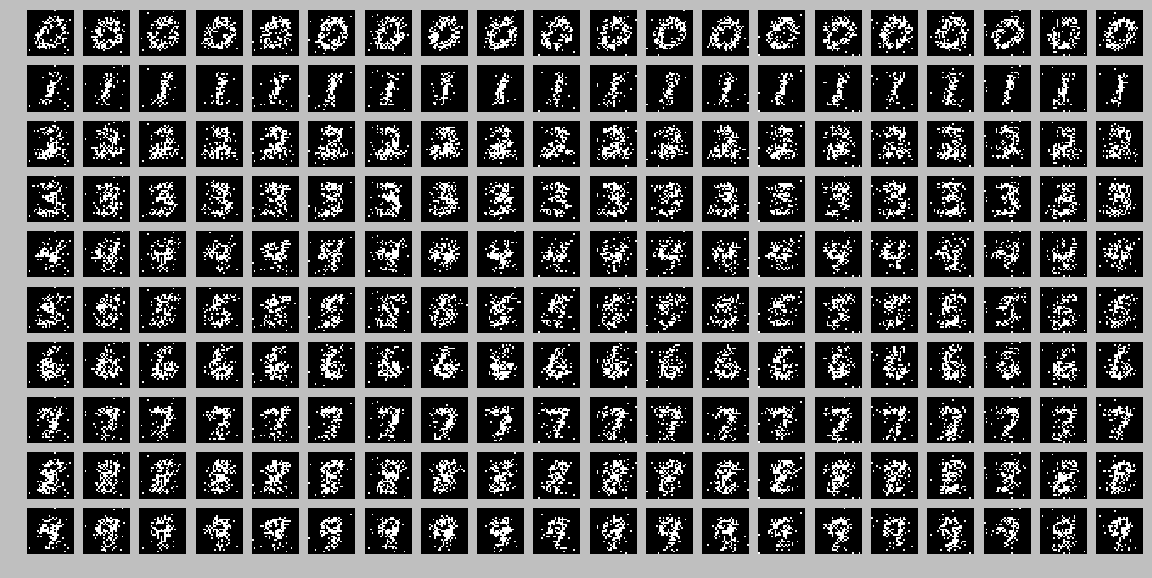

In [15]:
def P10(num_examples):
    """Produce num_examples number of examples of each digit 0-9 using a Bernoulli model"""

### STUDENT START ###

    #Define bernoulli model
    brn = BernoulliNB(binarize=.5)
    brn.fit(mini_train_data, mini_train_labels)
    #predict = brn.predict(dev_data)
    
    #estimate probability of each pixel and convert back from log
    prob = np.exp(brn.feature_log_prob_) 
    #generate 20 random items of 784 features
    nums = np.random.rand(num_examples,784) 

    digits=()

    #create example of each digit
    for i in range(0,10):
        z=np.copy(nums)
        #assign pixels with probability > its value to 1, all others to 0
        z[z<=prob[i]]=1;z[z!=1]=0
        digits+=z,
    
    #reshape for plotting
    digits=np.array(digits).reshape(10*num_examples,784)

    
    #plot
    fig = plt.figure(figsize=(num_examples,10))
    for i in range(1,10*num_examples+1):
        plt.subplot(10,num_examples,i)
        plt.style.use("grayscale")
        plt.axis('off')
        plt.imshow(digits[i-1].reshape((28,28)))
    
P10(20)  

#### ANSWER:

The generated digits are fairly recognizable (some moreso than others), but are more "fuzzy" than the training digits. This is possibly due to the fact that we used binary values, 0 and 1, removing a wide range of pixle values. 

### (11) Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

How would you characterize the calibration for the Naive Bayes model?

In [16]:
def P11(buckets, correct, total):
    
### STUDENT START ###
    
    #create a function that "bins" each probability into the appropriate bucket
    def bucket(prob, buckets):
        for i in range(len(buckets)):
            if i==0:
                if prob<buckets[i]:
                    return i
            elif i==len(buckets)-1:
                if prob>=buckets[i]:
                    return i
            else:
                if prob>=buckets[i-1] and prob<buckets[i]:
                    return i
        return i

    #Define bernoulli model with alpha=.01 (optimal alpha from q8)
    brn=BernoulliNB(alpha=.01, binarize=.5)
    brn.fit(mini_train_data, mini_train_labels)

    #Get probabilities and predictions for dev_data
    probabilities = brn.predict_proba(dev_data)
    predictions = brn.predict(dev_data)

    for index, probs in enumerate(probabilities):
        #get max post probability for each dev digit
        prob = np.max(probs)
        #use function to bucket the max probabilities
        bkt = bucket(prob,buckets)
        #count total
        total[bkt]+=1
        #count correct (prediction matches label)
        if predictions[index]==dev_labels[index]:
            correct[bkt]+=1
            
### STUDENT END ###
            
buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print ('p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy))

p(pred) <= 0.5000000000000    total =   0    accuracy = 0.000
p(pred) <= 0.9000000000000    total =  30    accuracy = 0.200
p(pred) <= 0.9990000000000    total =  86    accuracy = 0.465
p(pred) <= 0.9999900000000    total =  85    accuracy = 0.612
p(pred) <= 0.9999999000000    total =  58    accuracy = 0.690
p(pred) <= 0.9999999990000    total =  61    accuracy = 0.754
p(pred) <= 0.9999999999900    total =  73    accuracy = 0.877
p(pred) <= 0.9999999999999    total =  75    accuracy = 0.840
p(pred) <= 1.0000000000000    total = 532    accuracy = 0.953


#### ANSWER:

We see that when when alpha=.01, when p(pred)<=.9, accuracy is only .2. Therefore it is not strongly callibrated. We do see that as accuracy increases as posterior probabilities increase however, so therefore this Naive Bayes classifier is weakly calibrated. 

### (12) EXTRA CREDIT: Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:

Try summing the pixel values in each row and each column.
Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [18]:
#def P12():

### STUDENT START ###

    #Sorry, ran out of time

### STUDENT END ###

#P12()